In [71]:
import numpy as np
import pygimli as pg
from pygimli.physics import ert
import pygimli.meshtools as mt

In [72]:
data = ert.load('Surveys/full_data/nov25_1_pygimli copy.dat')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f984bef460>)

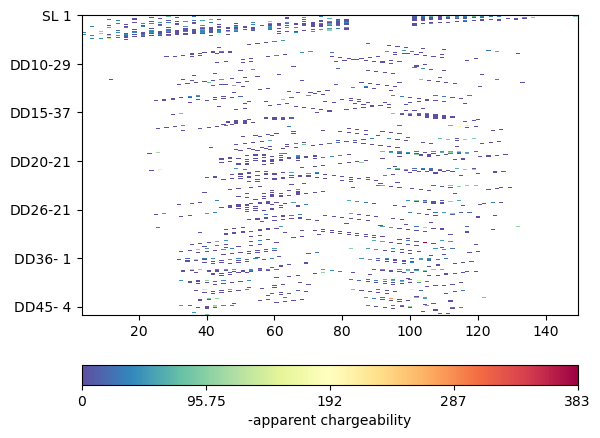

In [73]:
data.show("ip", label="-apparent chargeability")

In [74]:
data["k"] = ert.geometricFactors(data)

In [75]:
data["rhoa"] = data("r") * data("k") 

In [76]:
data.estimateError()

In [77]:
import seaborn as sns
import pandas as pd

<Axes: ylabel='Count'>

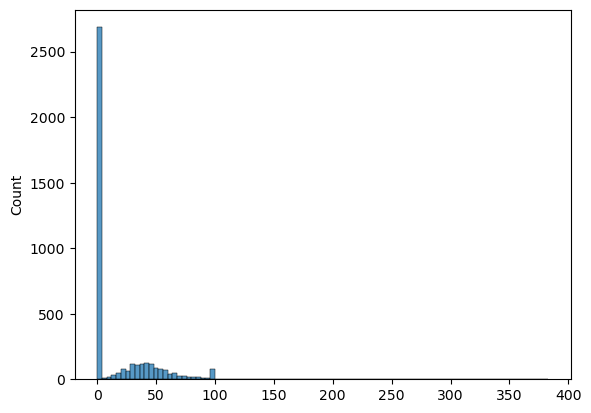

In [78]:
sns.histplot(data["ip"])

In [14]:
data.remove(data["ip"] < 0)

In [79]:
# replace zeros with 0.1
for i in range(len(data["ip"])):
    if data["ip"][i] <= 0:
        data["ip"][i] = 0.1

<Axes: ylabel='Count'>

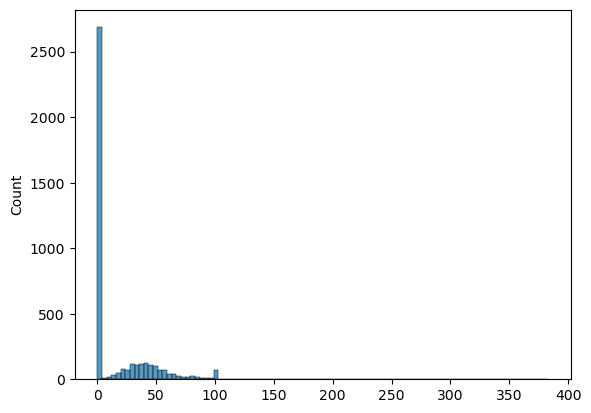

In [80]:
sns.histplot(data["ip"])

In [81]:
min(data["ip"])

0.1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f9837b9130>)

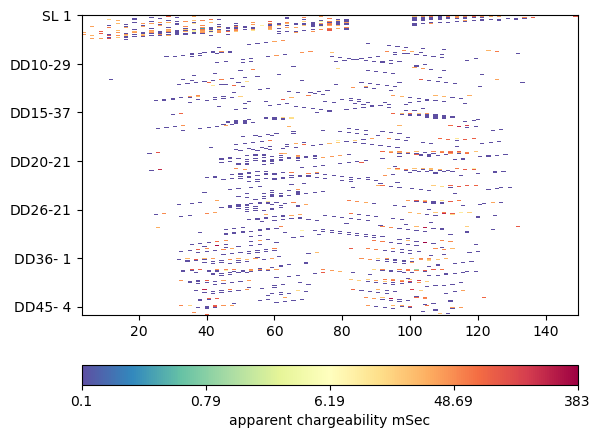

In [82]:
data.show("ip", label="apparent chargeability mSec")

In [64]:
print(data)

Data: Sensors: 64 data: 4067, nonzero entries: ['a', 'b', 'err', 'ip', 'k', 'm', 'n', 'r', 'rhoa', 'valid']


In [83]:
data.remove(data["ip"] > 100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f983e5dfd0>)

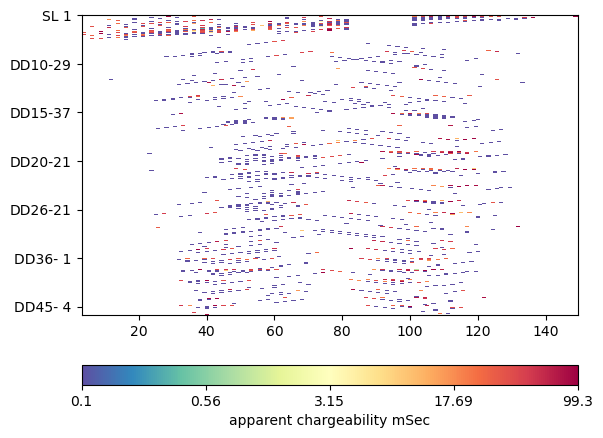

In [84]:
data.show("ip", label="apparent chargeability mSec")

In [85]:
mgr = ert.ERTIPManager(data)
mgr.invert(verbose=True, lam=50)

09/02/24 - 15:12:29 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 15:12:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 15:12:29 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 15:12:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 15:12:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/02/24 - 15:12:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
09/02/24 - 15:12:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
09/02/24 - 15:12:29 - pyGIMLi - INFO - Use median(data values)=115.03881138206025
09/02/24 - 15:12:29 - pyGIMLi - INFO - Created startmodel from forward operator: 1017, min/max=115.038811/115.038811
09/02/24 - 15:12:29 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F983B92630>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001F983B92770>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001F983B926D0>
min/max (data): 2.26/1.9e+04
min/max (error): 3%/3.04%
min/max (start model): 115/115
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1651.24
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1002.85 (dPhi = 39.15%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  809.54 (dPhi = 19.07%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  738.45 (dPhi = 8.57%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  686.66 (dPhi = 6.70%) lam: 50.0
--------------

09/02/24 - 15:14:08 - pyGIMLi - INFO - Found 1 regions.
09/02/24 - 15:14:08 - pyGIMLi - INFO - Starting inversion.


chi² =  559.14 (dPhi = 1.94%) lam: 50.0
################################################################################
#                Abort criterion reached: dPhi = 1.94 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x000001F983BC6CC0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001F983BA9F40>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001F986A2EE00>
min/max (data): 1.0e-04/0.1
min/max (error): 4.01%/1003%
min/max (start model): 1.0e-04/1.0e-04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  117.17
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  116.37 (dPhi = 0.69%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  110.28 (dPhi = 5.22%) lam: 1

(1450.0, 1490.006104)

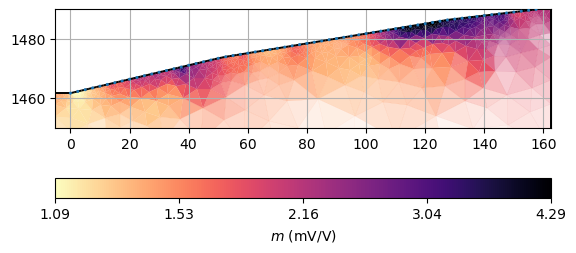

In [86]:
# Visualización de resultados con límites de color específicos
ax, cb = mgr.showIPModel(ipkw={'cMax': 112})

# Ajustar la cuadrícula y los límites de los ejes para la gráfica
ax.grid(True)
ax.set_ylim([1450, ax.get_ylim()[1]])

(1450.0, 1490.006104)

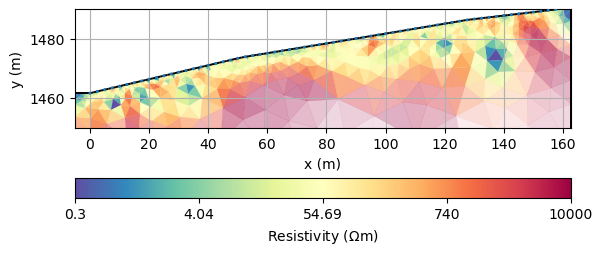

In [87]:
# Visualización de resultados con límites de color específicos
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0, cMax=10000)
ax, cb = mgr.showResult(**kw)

# Ajustar la cuadrícula y los límites de los ejes para la gráfica
ax.grid(True)
ax.set_ylim([1450, ax.get_ylim()[1]])